<a href="https://colab.research.google.com/github/shantanushrivastava/machine_learning/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data,columns =iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [12]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [14]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

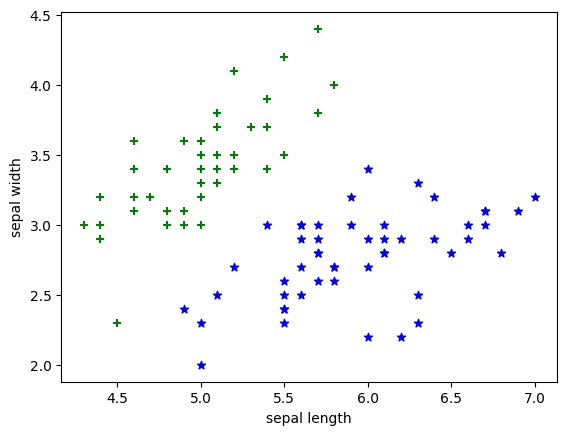

In [20]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="blue",marker='*')

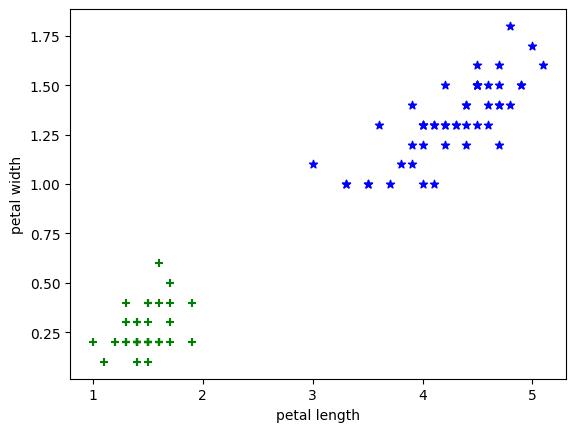

In [23]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="blue",marker='*')

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
x = df.drop(['target','flower_name'],axis='columns')
y = df.target

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=1)

In [28]:
len(x_train)

120

In [29]:
len(x_test)

30

In [44]:
error1= []
error2= []
for k in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred1 = knn.predict(x_train)
  error1.append(np.mean(y_train!= y_pred1))
  y_pred2 = knn.predict(x_test)
  error2.append(np.mean(y_test!= y_pred2))


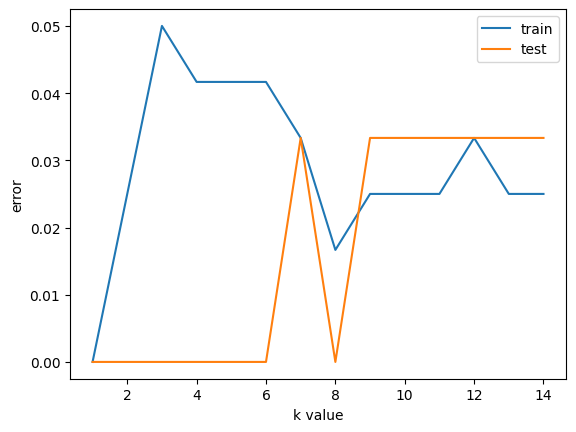

In [54]:
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k value')
plt.ylabel('error')
plt.legend()

In [77]:
knn = KNeighborsClassifier(n_neighbors = 8)

In [78]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [79]:
knn.score(x_test,y_test)

1.0

In [80]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm



array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Text(58.222222222222214, 0.5, 'Truth')

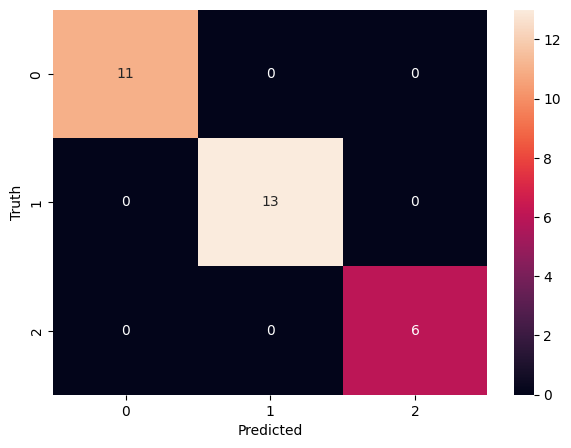

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

